In [1]:
from os import listdir
from os.path import isfile, join
address = "C:/Users/s9dhc/OneDrive/Desktop/project climate/LCZ_2" 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from termcolor import colored

In [4]:
def full_print(dataframe):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

        print(dataframe)
        
    return None


In [5]:
def custom_definition(all_dataframes, number_of_files):
    
    print('Forming Datetime column by combining different columns. Building block(columns) are then removed.')

    for i in range(0,number_of_files):
            all_dataframes[i]["time"] = (pd.to_datetime(all_dataframes[i]['HH'].astype(str) + ':' + all_dataframes[i]['MM'].astype(str), format='%H:%M').dt.time)
            all_dataframes[i]["Datetime"] = pd.to_datetime(all_dataframes[i]["Date"].astype(str) +" "+all_dataframes[i]["time"].astype(str))
            all_dataframes[i]=all_dataframes[i].drop(columns =["HH", "MM", "Date","time"])
            
    return all_dataframes

In [6]:
def read_Dat(address):
    onlyfiles = [f for f in listdir("C:/Users/s9dhc/OneDrive/Desktop/project climate/LCZ_2") if isfile(join("C:/Users/s9dhc/OneDrive/Desktop/project climate/LCZ_2/", f))]
    print(f"Location of file: {address} \n")
    files = []

    for x in onlyfiles:
        files.append(x[:-4])
    print('The following .Dat files are foud:')
    for k in files:
        print(k)
    
    print('\n\n')
    print('The all_dataframes variable is a array containing all the dataframes numbered from 0 to some value.\n')
    number_of_files = len(files)
        
    all_dataframes = []
    
    for i in range(0, number_of_files):
        x =  "df%s" %i
        print('all_dataframes[%d] represents %s' %(i,files[i]))

        x =  pd.read_csv("%s/%s.DAT" %(address, files[i]), delimiter=';', skiprows = 0, usecols = ["yyyy" ,"mm" ,"dd" ,"HH" ,"MM" ,"ta"],parse_dates={'Date': ['yyyy', 'mm', 'dd']}, index_col = False)
        all_dataframes.append(x)
    
    print('\nColumn format: YYYY|mm|dd|HH|MM|ta|\n')
    
    
    
    custom_definition(all_dataframes, number_of_files)
    
    print('Exhibiting first dataset:')
    print(all_dataframes[0])

    return all_dataframes

    

In [7]:
df = read_Dat(address)

Location of file: C:/Users/s9dhc/OneDrive/Desktop/project climate/LCZ_2 

The following .Dat files are foud:
18_Schillerstr_UTC_05min_ta_2022-07
18_Schillerstr_UTC_05min_ta_2022-08
18_Schillerstr_UTC_05min_ta_2022-09
19_Galvanistr_UTC_05min_ta_2022-07
19_Galvanistr_UTC_05min_ta_2022-08
19_Galvanistr_UTC_05min_ta_2022-09
33_Jagow_UTC_05min_ta_2022-07
33_Jagow_UTC_05min_ta_2022-08
33_Jagow_UTC_05min_ta_2022-09
34_Planetarium_UTC_05min_ta_2022-07
34_Planetarium_UTC_05min_ta_2022-08
34_Planetarium_UTC_05min_ta_2022-09



The all_dataframes variable is a array containing all the dataframes numbered from 0 to some value.

all_dataframes[0] represents 18_Schillerstr_UTC_05min_ta_2022-07
all_dataframes[1] represents 18_Schillerstr_UTC_05min_ta_2022-08
all_dataframes[2] represents 18_Schillerstr_UTC_05min_ta_2022-09
all_dataframes[3] represents 19_Galvanistr_UTC_05min_ta_2022-07
all_dataframes[4] represents 19_Galvanistr_UTC_05min_ta_2022-08
all_dataframes[5] represents 19_Galvanistr_UTC_05min_

In [8]:
Schillerstr = pd.concat([df[0],df[1],df[2]])
Galvanistr = pd.concat([df[3],df[4],df[5]])
Jagow = pd.concat([df[6],df[7],df[8]])
Planetarium = pd.concat([df[9],df[10],df[11]])

In [9]:
def average(dataframe,by, frequency, about):
    
    if by == 'minute':
        new_dataframe = dataframe.resample(rule=frequency, on =about).mean()
    
    if by == 'hour':
        new_dataframe = dataframe.resample(rule=frequency, on =about).mean()
    
    if by == 'daily':    
        new_dataframe = dataframe.resample(rule=frequency, on =about).mean()

    print(new_dataframe.head(5))
    
    return new_dataframe

    

### Daily averages:

In [10]:
daily_Schillerstr =average(Schillerstr, 'daily',"D", "Datetime" )
daily_Galvanistr = average(Galvanistr, 'daily',"D", "Datetime" )
daily_Jagow=average(Jagow, 'daily',"D", "Datetime" )
daily_Planetarium=average(Planetarium, 'daily',"D", "Datetime" )

                   ta
Datetime             
2022-07-01  19.965174
2022-07-02  21.786806
2022-07-03  25.002396
2022-07-04  21.790104
2022-07-05  21.326042
                   ta
Datetime             
2022-07-01  19.473299
2022-07-02  21.376701
2022-07-03  25.092431
2022-07-04  21.180243
2022-07-05  20.398368
                   ta
Datetime             
2022-07-01  19.504514
2022-07-02  21.320833
2022-07-03  24.507292
2022-07-04  21.402431
2022-07-05  20.910417
                   ta
Datetime             
2022-07-01  20.161458
2022-07-02  22.506944
2022-07-03  24.893750
2022-07-04  22.054861
2022-07-05  21.644444


<AxesSubplot:xlabel='Datetime'>

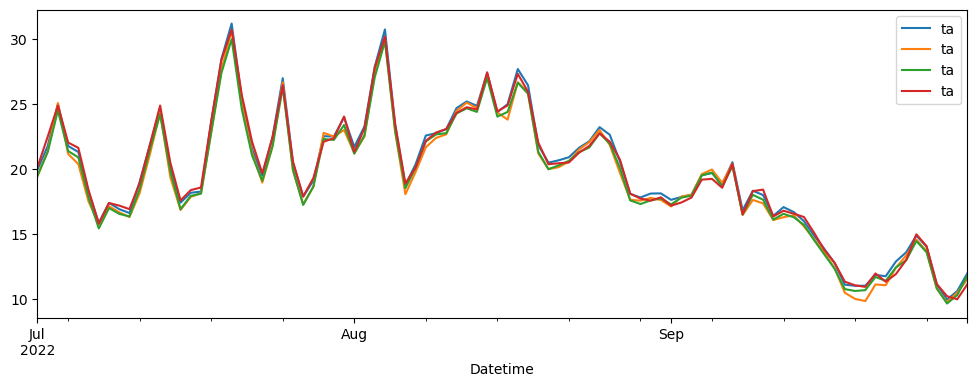

In [11]:
ax = daily_Schillerstr.plot(figsize=(12,4),label='Schillerstr') 

daily_Galvanistr.plot(ax=ax,label='Galvanistr')
daily_Jagow.plot(ax=ax,label='Jagow')
daily_Planetarium.plot(ax=ax,label='Planetarium')

<AxesSubplot:xlabel='Datetime'>

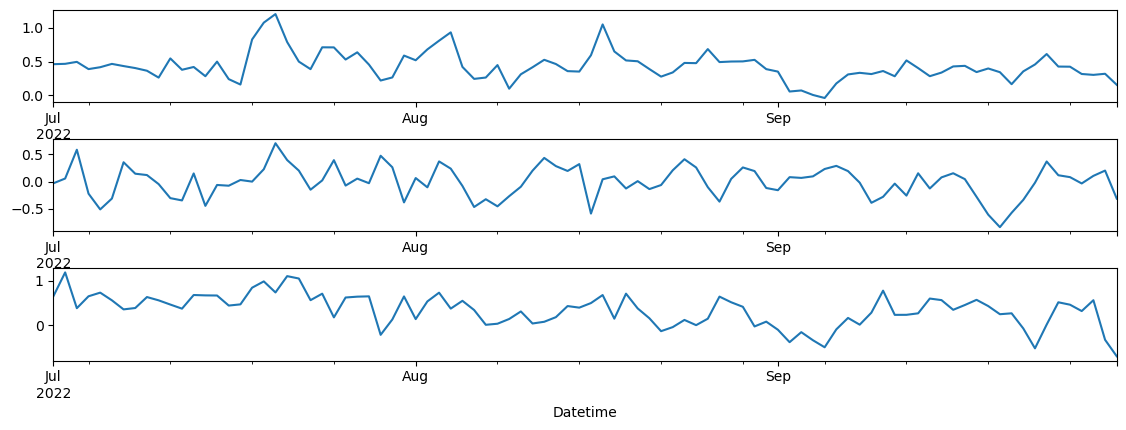

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols= 1)
fig.tight_layout() 

(daily_Schillerstr["ta"]- daily_Jagow["ta"]).plot( figsize=(12,4), label = "Schillerstr - Jagow", ax = axes[0])
(daily_Galvanistr["ta"]- daily_Jagow["ta"]).plot( figsize=(12,4), label = "Galvanistr - Jagow", ax = axes[1])
(daily_Planetarium["ta"]- daily_Jagow["ta"]).plot( figsize=(12,4), label = "Planetarium - Jagow", ax = axes[2])


<AxesSubplot:xlabel='Datetime'>

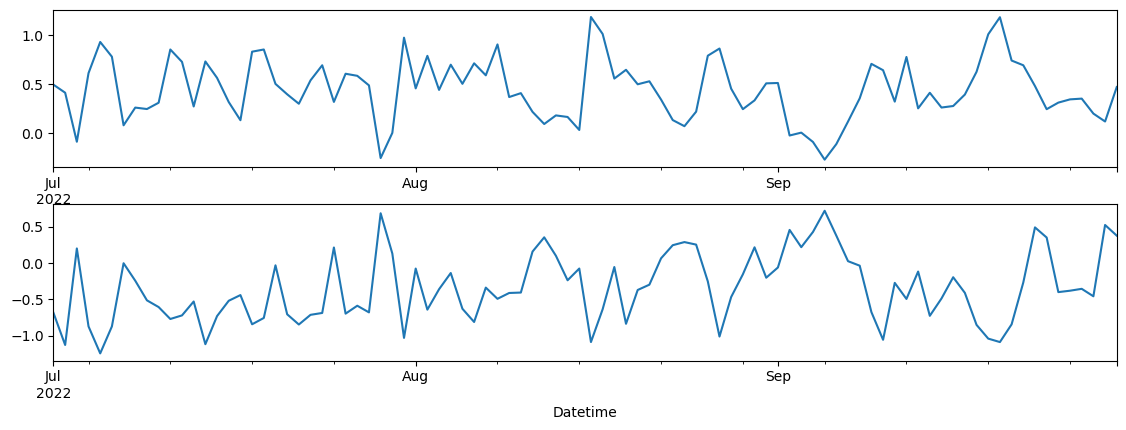

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols= 1)
fig.tight_layout() 

(daily_Schillerstr["ta"]- daily_Galvanistr["ta"]).plot( figsize=(12,4), label = "Schillerstr - Galvanistr", ax = axes[0])
(daily_Galvanistr["ta"]- daily_Planetarium["ta"]).plot( figsize=(12,4), label = "Galvanistr - Planetarium", ax = axes[1])


### 10 - Minute based average

In [14]:
minutely_Schillerstr =average(Schillerstr, 'minute',"30T", "Datetime" )
minutely_Galvanistr = average(Galvanistr, 'minute',"30T", "Datetime" )
minutely_Jagow=average(Jagow, 'minute',"30T", "Datetime" )
minutely_Planetarium=average(Planetarium, 'minute',"30T", "Datetime" )

                            ta
Datetime                      
2022-07-01 00:00:00  22.711667
2022-07-01 00:30:00  22.330000
2022-07-01 01:00:00  22.151667
2022-07-01 01:30:00  22.051667
2022-07-01 02:00:00  21.901667
                            ta
Datetime                      
2022-07-01 00:00:00  22.648333
2022-07-01 00:30:00  22.390000
2022-07-01 01:00:00  22.106667
2022-07-01 01:30:00  21.913333
2022-07-01 02:00:00  21.816667
                            ta
Datetime                      
2022-07-01 00:00:00  22.450000
2022-07-01 00:30:00  22.116667
2022-07-01 01:00:00  21.933333
2022-07-01 01:30:00  21.800000
2022-07-01 02:00:00  21.700000
                            ta
Datetime                      
2022-07-01 00:00:00  21.600000
2022-07-01 00:30:00  21.316667
2022-07-01 01:00:00  21.150000
2022-07-01 01:30:00  21.083333
2022-07-01 02:00:00  21.000000


<AxesSubplot:xlabel='Datetime'>

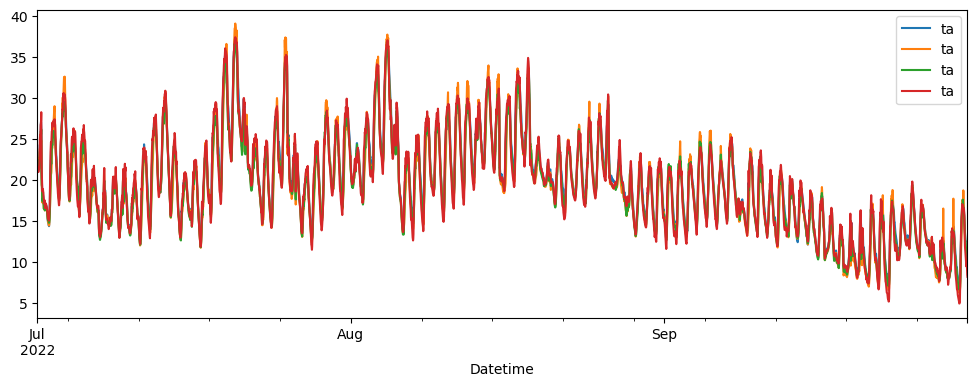

In [15]:
ax = minutely_Schillerstr.plot(figsize=(12,4),label='Schillerstr') 

minutely_Galvanistr.plot(ax=ax,label='Galvanistr')
minutely_Jagow.plot(ax=ax,label='Jagow')
minutely_Planetarium.plot(ax=ax,label='Planetarium')

<AxesSubplot:xlabel='Datetime'>

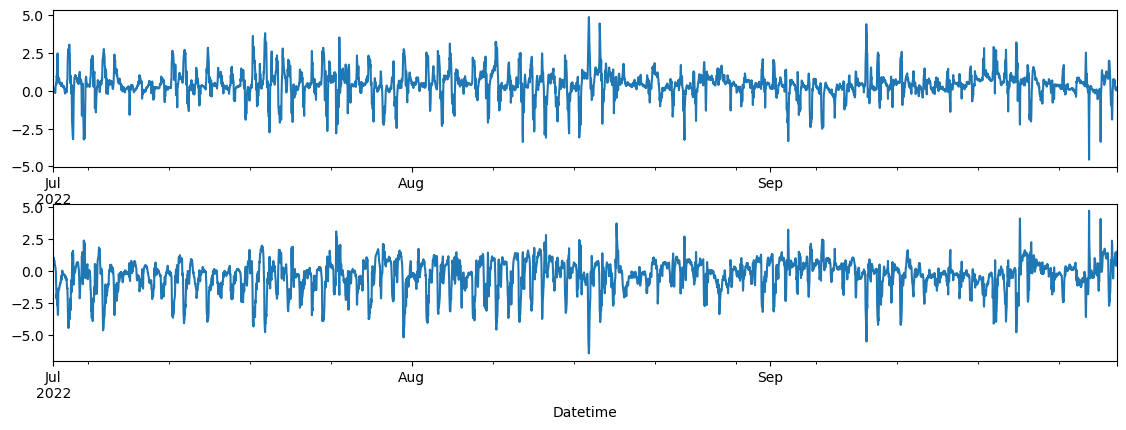

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols= 1)
fig.tight_layout() 

(minutely_Schillerstr["ta"]- minutely_Galvanistr["ta"]).plot( figsize=(12,4), label = "Schillerstr - Galvanistr", ax = axes[0])
(minutely_Galvanistr["ta"]- minutely_Planetarium["ta"]).plot( figsize=(12,4), label = "Galvanistr - Planetarium", ax = axes[1])


### 1 - hour based average

In [17]:
hourly_Schillerstr =average(Schillerstr, 'hour',"H", "Datetime" )
hourly_Galvanistr = average(Galvanistr, 'hour',"H", "Datetime" )
hourly_Jagow=average(Jagow, 'hour',"H", "Datetime" )
hourly_Planetarium=average(Planetarium, 'hour',"H", "Datetime" )

                            ta
Datetime                      
2022-07-01 00:00:00  22.520833
2022-07-01 01:00:00  22.101667
2022-07-01 02:00:00  21.847500
2022-07-01 03:00:00  21.568333
2022-07-01 04:00:00  22.170833
                            ta
Datetime                      
2022-07-01 00:00:00  22.519167
2022-07-01 01:00:00  22.010000
2022-07-01 02:00:00  21.740833
2022-07-01 03:00:00  21.645833
2022-07-01 04:00:00  22.003333
                            ta
Datetime                      
2022-07-01 00:00:00  22.283333
2022-07-01 01:00:00  21.866667
2022-07-01 02:00:00  21.658333
2022-07-01 03:00:00  21.358333
2022-07-01 04:00:00  21.658333
                            ta
Datetime                      
2022-07-01 00:00:00  21.458333
2022-07-01 01:00:00  21.116667
2022-07-01 02:00:00  21.008333
2022-07-01 03:00:00  21.216667
2022-07-01 04:00:00  21.800000


<AxesSubplot:xlabel='Datetime'>

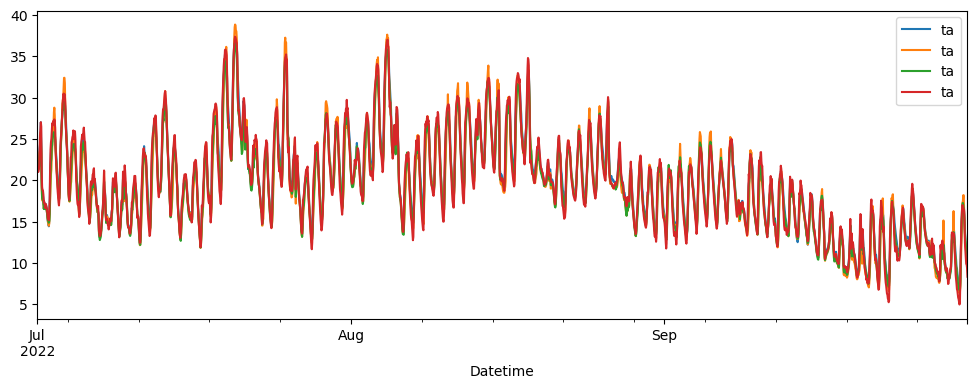

In [18]:
ax = hourly_Schillerstr.plot(figsize=(12,4),label='Schillerstr') 

hourly_Galvanistr.plot(ax=ax,label='Galvanistr')
hourly_Jagow.plot(ax=ax,label='Jagow')
hourly_Planetarium.plot(ax=ax,label='Planetarium')

<AxesSubplot:xlabel='Datetime'>

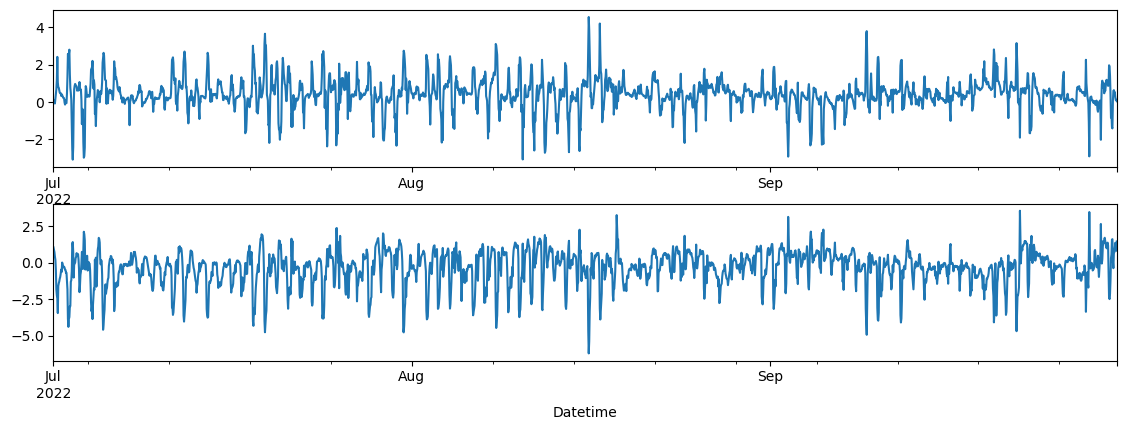

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols= 1)
fig.tight_layout() 

(hourly_Schillerstr["ta"]- hourly_Galvanistr["ta"]).plot( figsize=(12,4), label = "Schillerstr - Galvanistr", ax = axes[0])
(hourly_Galvanistr["ta"]- hourly_Planetarium["ta"]).plot( figsize=(12,4), label = "Galvanistr - Planetarium", ax = axes[1])


In [20]:
full_print(minutely_Schillerstr)

                            ta
Datetime                      
2022-07-01 00:00:00  22.711667
2022-07-01 00:30:00  22.330000
2022-07-01 01:00:00  22.151667
2022-07-01 01:30:00  22.051667
2022-07-01 02:00:00  21.901667
2022-07-01 02:30:00  21.793333
2022-07-01 03:00:00  21.648333
2022-07-01 03:30:00  21.488333
2022-07-01 04:00:00  21.765000
2022-07-01 04:30:00  22.576667
2022-07-01 05:00:00  23.320000
2022-07-01 05:30:00  24.333333
2022-07-01 06:00:00  24.281667
2022-07-01 06:30:00  24.335000
2022-07-01 07:00:00  24.630000
2022-07-01 07:30:00  25.510000
2022-07-01 08:00:00  26.931667
2022-07-01 08:30:00  27.098333
2022-07-01 09:00:00  26.338333
2022-07-01 09:30:00  21.831667
2022-07-01 10:00:00  20.313333
2022-07-01 10:30:00  19.873333
2022-07-01 11:00:00  19.045000
2022-07-01 11:30:00  18.071667
2022-07-01 12:00:00  18.040000
2022-07-01 12:30:00  18.265000
2022-07-01 13:00:00  18.270000
2022-07-01 13:30:00  18.105000
2022-07-01 14:00:00  17.923333
2022-07-01 14:30:00  17.676667
2022-07-

In [21]:
full_print(hourly_Schillerstr)

                            ta
Datetime                      
2022-07-01 00:00:00  22.520833
2022-07-01 01:00:00  22.101667
2022-07-01 02:00:00  21.847500
2022-07-01 03:00:00  21.568333
2022-07-01 04:00:00  22.170833
2022-07-01 05:00:00  23.826667
2022-07-01 06:00:00  24.308333
2022-07-01 07:00:00  25.070000
2022-07-01 08:00:00  27.015000
2022-07-01 09:00:00  24.085000
2022-07-01 10:00:00  20.093333
2022-07-01 11:00:00  18.558333
2022-07-01 12:00:00  18.152500
2022-07-01 13:00:00  18.187500
2022-07-01 14:00:00  17.800000
2022-07-01 15:00:00  17.043333
2022-07-01 16:00:00  17.299167
2022-07-01 17:00:00  16.959167
2022-07-01 18:00:00  17.055833
2022-07-01 19:00:00  17.175000
2022-07-01 20:00:00  17.045000
2022-07-01 21:00:00  16.850833
2022-07-01 22:00:00  16.585000
2022-07-01 23:00:00  15.845000
2022-07-02 00:00:00  15.201667
2022-07-02 01:00:00  14.988333
2022-07-02 02:00:00  14.629167
2022-07-02 03:00:00  14.443333
2022-07-02 04:00:00  15.248333
2022-07-02 05:00:00  17.193333
2022-07-

In [28]:
full_print(daily_Schillerstr)

                   ta
Datetime             
2022-07-01  19.965174
2022-07-02  21.786806
2022-07-03  25.002396
2022-07-04  21.790104
2022-07-05  21.326042
2022-07-06  18.292083
2022-07-07  15.888299
2022-07-08  17.421007
2022-07-09  16.939757
2022-07-10  16.637917
2022-07-11  19.026528
2022-07-12  21.874444
2022-07-13  24.635417
2022-07-14  20.120660
2022-07-15  17.437917
2022-07-16  18.194549
2022-07-17  18.287639
2022-07-18  23.664653
2022-07-19  28.476597
2022-07-20  31.195799
2022-07-21  25.366771
2022-07-22  21.557847
2022-07-23  19.514306
2022-07-24  22.468160
2022-07-25  26.995069
2022-07-26  20.496771
2022-07-27  17.900000
2022-07-28  19.139375
2022-07-29  22.542778
2022-07-30  22.516701
2022-07-31  23.990000
2022-08-01  21.714931
2022-08-02  23.301076
2022-08-03  27.868403
2022-08-04  30.744236
2022-08-05  23.367014
2022-08-06  18.791979
2022-08-07  20.382222
2022-08-08  22.591319
2022-08-09  22.774965
2022-08-10  23.088507
2022-08-11  24.696562
2022-08-12  25.210243
2022-08-13

<AxesSubplot:xlabel='Datetime'>

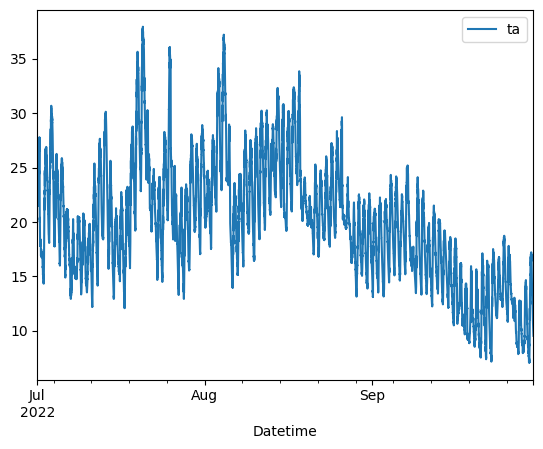

In [26]:
Schillerstr.plot(x="Datetime", y="ta")